ANN Regresiva con dataset dataset_186_satimage

In [1]:
# Funciones para el procesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [2]:
data_origin = pd.read_csv(r'../3_Normalización/datasets/abalone_dataset.csv', header=None)
dataset = fit_cols(data_origin, [0], Ordinal)
dataset = fit_cols(dataset, dataset.columns, Min_Max)
# dataset.head(20)
dataset.describe()

,0,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.526454,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503,0.319060
std,0.411120,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717,0.115149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052,0.250000
50%,0.500000,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689,0.285714
75%,1.000000,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358,0.357143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset, [8])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(3341, 8) (3341, 1)
(836, 8) (836, 1)


In [44]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop



def Show_History(History):
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)

Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)

In [45]:
# loss 0.88% (epochs 30, batch_size 5)
# loss 0.84% (epochs 100, batch_size 10)
# loss 0.71% (epochs 20, batch_size 1)
def Model1():
    model = Sequential()
    model.add(Dense(20,input_dim=8,activation='relu'))
    model.add(Dense(36, activation='relu' ))
    model.add(Dense(1, activation='sigmoid'))
 
    model.compile(loss='mean_squared_error',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model

# Probamos el primer modelo con otro optimizador
# loss 0.59% (epochs 30, batch_size 5)
# loss 0.56% (epochs 100, batch_size 10)
# loss 0.59% (epochs 20, batch_size 1)
def Model2():
    model = Sequential()
    model.add(Dense(20,input_dim=8,activation='relu'))
    model.add(Dense(36, activation='relu' ))
    model.add(Dense(1, activation='sigmoid'))
 
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Modificamos la estructur de la red
# loss 0.81% (epochs 30, batch_size 5)
# loss 0.82% (epochs 100, batch_size 10)
# loss 0.71% (epochs 20, batch_size 1)
def Model3():
    model = Sequential()
    model.add(Dense(16,input_dim=8,activation='relu'))
    model.add(Dense(24, activation='relu' ))
    model.add(Dense(1, activation='sigmoid'))
 
    model.compile(loss='mean_squared_error',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model

M=Model3()

Epoch 1/30
3341/3341 [==============================] - 2s 661us/step - loss: 0.0163 - accuracy: 2.9931e-04 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 2/30
3341/3341 [==============================] - 2s 633us/step - loss: 0.0121 - accuracy: 2.9931e-04 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 3/30
3341/3341 [==============================] - 2s 639us/step - loss: 0.0103 - accuracy: 2.9931e-04 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 4/30
3341/3341 [==============================] - 2s 645us/step - loss: 0.0095 - accuracy: 2.9931e-04 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 5/30
3341/3341 [==============================] - 2s 624us/step - loss: 0.0091 - accuracy: 2.9931e-04 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 6/30
3341/3341 [==============================] - 2s 630us/step - loss: 0.0089 - accuracy: 2.9931e-04 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 7/30
3341/3341 [==============================] - 2s 645us/step - loss

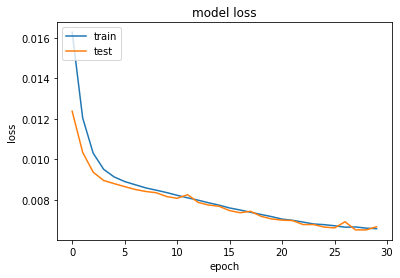

In [46]:
History=M.fit(X_train,Y_train,
              epochs=30,
              batch_size=1,
              validation_data=(X_test,Y_test))

Show_History(History)